In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv('UCL_data.csv')

In [3]:
df

,MES,FLIGHT_HOURS,NUMERO_DE_REPORTES,ATA
0,Enero,40102,24,36
1,Febrero,41818,23,36
2,Marzo,52510,21,36
3,Abril,39982,18,36
4,Mayo,36110,18,36
5,Junio,33840,22,36
6,Julio,41800,23,36
7,Agosto,36360,20,36
8,Septiembre,42220,19,36
9,Octubre,38180,21,36


In [4]:
df['DATA'] = ((df.NUMERO_DE_REPORTES*1000)/df.FLIGHT_HOURS)
df

,MES,FLIGHT_HOURS,NUMERO_DE_REPORTES,ATA,DATA
0,Enero,40102,24,36,0.598474
1,Febrero,41818,23,36,0.550002
2,Marzo,52510,21,36,0.399924
3,Abril,39982,18,36,0.450203
4,Mayo,36110,18,36,0.498477
5,Junio,33840,22,36,0.650118
6,Julio,41800,23,36,0.550239
7,Agosto,36360,20,36,0.550055
8,Septiembre,42220,19,36,0.450024
9,Octubre,38180,21,36,0.550026


In [5]:
mean=df['DATA'].mean()

In [6]:
mean

0.5123037303341392

In [7]:
var=df['DATA'].var()
var

0.009585289122769586

In [8]:
std=df['DATA'].std()

In [9]:
std

0.09790448979883193

In [10]:
median=df['DATA'].median()
median

0.5500142915190801

In [11]:
UCL=mean+(2*std)

In [12]:
UCL

0.7081127099318031

<ipython-input-13-975a46a7f122>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='blue')


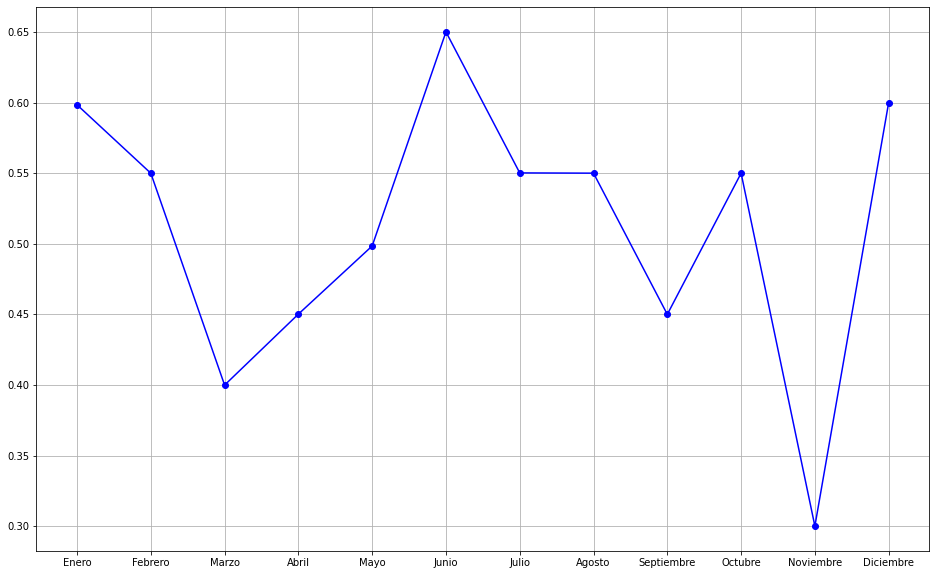

In [13]:
plt.figure(figsize=(16,10))
x =df ["MES"].values
y =df ["DATA"].values
plt.plot(x, y, '-ok', color='blue')
plt.grid()

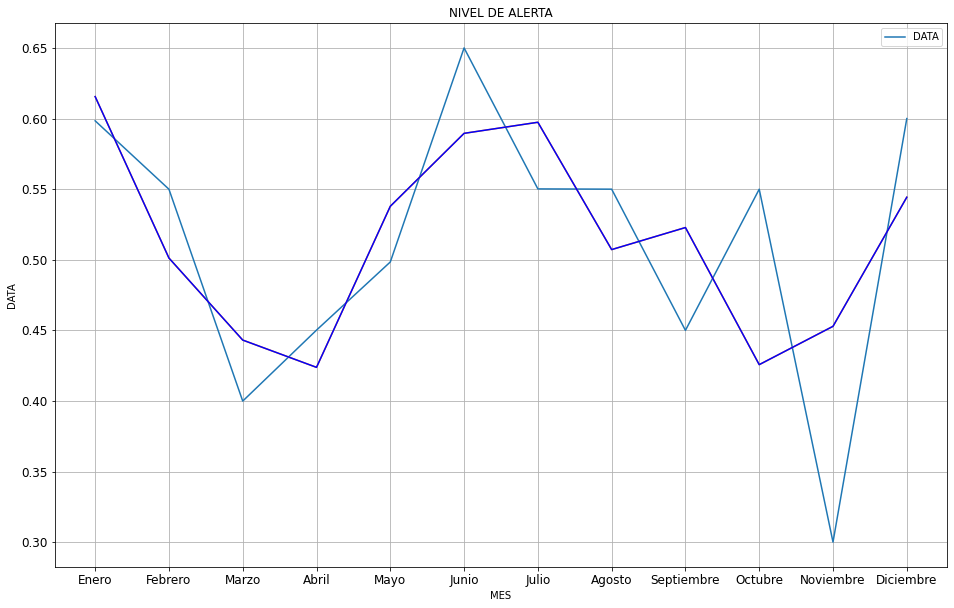

In [14]:
#UCL Nivel de Alerta Filtro Savitzky-Golay, suaviza los picos de la grafica
df[['DATA','MES']].plot(figsize=(16, 10), fontsize=12);
#plt.figure(figsize=(16,10))
yhat = savgol_filter(y, 5, 2) # window size 51, polynomial order 3 (sigma)
plt.plot(x,yhat)
plt.grid()
plt.plot(x,yhat, color='blue')
plt.xlabel('MES')
plt.ylabel('DATA')
plt.title('NIVEL DE ALERTA')
plt.show()


In [34]:
#ROLLING AVERAGE OFFSET 3 MESES
rolling_windows = df.rolling(5, min_periods=5)
rolling_mean = rolling_windows.mean()
df['ROLLING_AVERAGE'] = rolling_mean
df

ValueError: Wrong number of items passed 4, placement implies 1

In [35]:
df_3=df.drop([0, 1, 2],axis=0)
df_3

,MES,FLIGHT_HOURS,NUMERO_DE_REPORTES,ATA,DATA
3,Abril,39982,18,36,0.450203
4,Mayo,36110,18,36,0.498477
5,Junio,33840,22,36,0.650118
6,Julio,41800,23,36,0.550239
7,Agosto,36360,20,36,0.550055
8,Septiembre,42220,19,36,0.450024
9,Octubre,38180,21,36,0.550026
10,Noviembre,46660,14,36,0.300043
11,Diciembre,33330,20,36,0.600060


In [77]:
#df['ROLLING_AVERAGE'] = rolling_mean

ValueError: Wrong number of items passed 6, placement implies 1

<ipython-input-29-27603c6831c3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='blue')


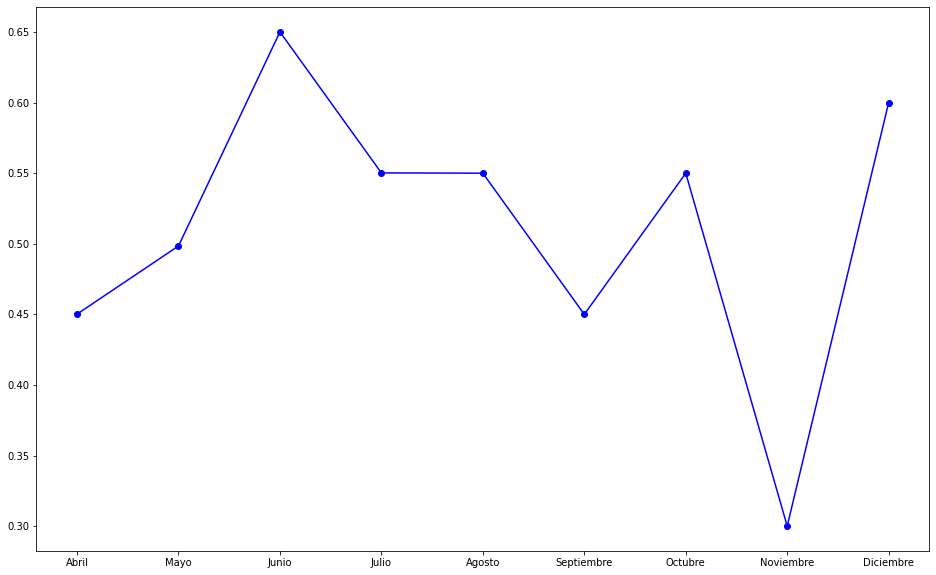

In [29]:
plt.figure(figsize=(16,10))
x =df_3 ["MES"].values
y =df_3 ["DATA"].values
plt.plot(x, y, '-ok', color='blue')

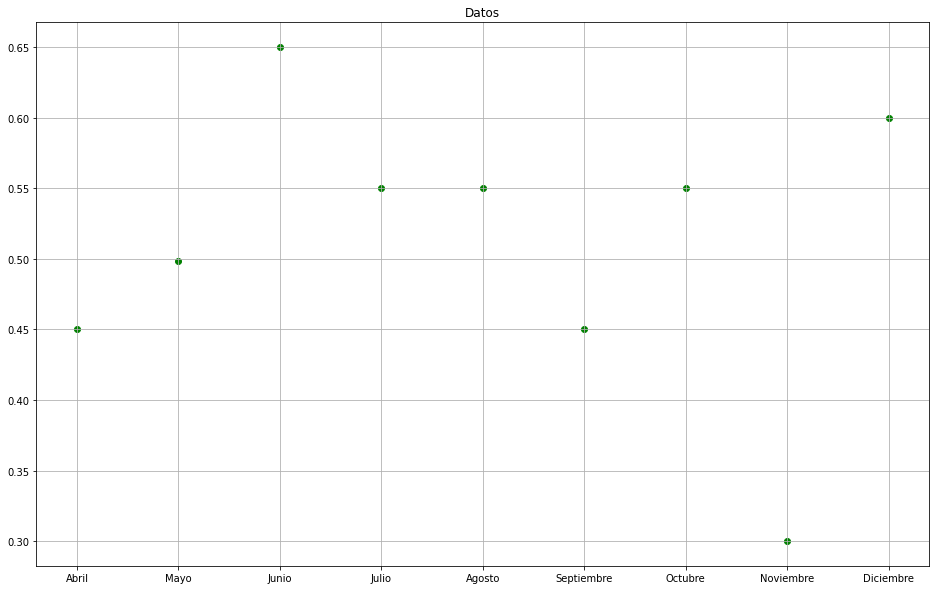

In [30]:
plt.figure(figsize=(16,10))
x =df_3 ["MES"].values
y =df_3 ["DATA"].values
plt.scatter(x,y,label='DATA', color='green')
plt.grid()
plt.title('Datos');

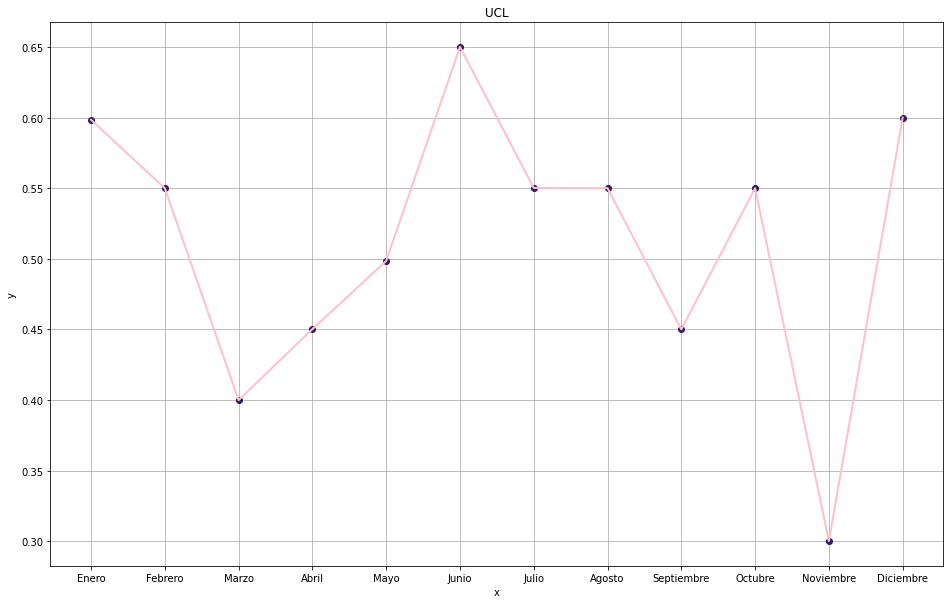

In [78]:
plt.figure(figsize=(16,10))
plt.plot(x,y,'o',linewidth=3,color=(0.2,0.1,0.4))
plt.plot(x,y,'-',linewidth=2,color='pink')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('UCL')
plt.show()

In [79]:
df_ciclo, df_tend = sm.tsa.filters.hpfilter(df['DATA'])
df['TREND'] = df_tend

In [42]:
df

,MES,FLIGHT_HOURS,NUMERO_DE_REPORTES,ATA,DATA,TREND
0,Enero,40102,24,36,0.598474,0.533954
1,Febrero,41818,23,36,0.550002,0.529940
2,Marzo,52510,21,36,0.399924,0.525966
3,Abril,39982,18,36,0.450203,0.522085
4,Mayo,36110,18,36,0.498477,0.518272
5,Junio,33840,22,36,0.650118,0.514455
6,Julio,41800,23,36,0.550239,0.510552
7,Agosto,36360,20,36,0.550055,0.506563
8,Septiembre,42220,19,36,0.450024,0.502515
9,Octubre,38180,21,36,0.550026,0.498462


UCL Nivel de Alerta
Filtro Savitzky-Golay, suaviza los picos de la grafica 

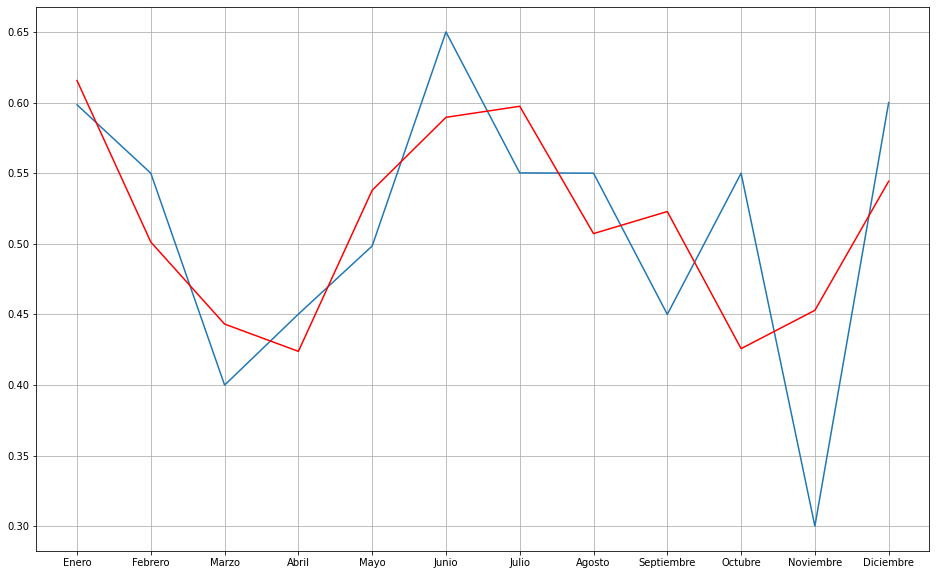

In [35]:
plt.figure(figsize=(16,10))
yhat = savgol_filter(y, 5, 2) # window size 51, polynomial order 3 (sigma)
plt.plot(x,y)
plt.plot()
plt.grid()
plt.plot(x,yhat, color='red')
plt.show()

In [32]:
df[['DATA','TREND']].plot(figsize=(16, 10), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);
plt.plot(x,yhat, color='red')
plt.grid()
plt.xlabel('MES')
plt.ylabel('DATA')
plt.title('ULC')

KeyError: "['TREND'] not in index"